Hello and welcome to my updated and refreshed coffee project. Several years ago as I was starting my Master's Degree, one of my first projects was a process improvement project. I looked to my personal life for a process that could be used. After a bit of thought, I settled on coffee. My coffee was inconsistent and I was occassionally picking it up on the way to work. Buying coffee every morning was expensive but my own coffee had no process. So I tracked it for about a month and realized how all over the place I was. I viewed a handful of tutorials online and set about making delicious coffee, consistently. 

Shortly after the class ended, I maintained the process but did not keep the data. Realizing again that this would be a unique project that could be ongoing and help grow my Python skills.

There are a couple of notes that I want to add here. I did not have an effective way to measure water temperature so I left that out. As I will mention later, quality of water is also excluded though it is considered quite important. This is because I always used the same source of water so it was kept as consistent as possible. Finally a note on the rating. This was purely subjective to my taste. Because the rating is to my taste, it will be inconsistent and not make great machine learning models when they are completed. That was the point, this was my own data that I captured and I hoped to make it at least sort of resemble some of the data I might see in the real world.

This side of the code is for exploring the data and a testing space. As the project is ongoing, the code in here will change as I interact with this data almost every day. I begin by importing the libraries that are needed.

In [96]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


I then read in the csv where my data is kept. I maintain a separate script where I enter and append the data into the csv then resave the csv for manipulation here.

In [97]:
df = pd.read_csv('coffee.csv', index_col = 0)
df.tail(15)

,Date,Brand,Roast,Blend,Iced,Grind_size,Method,Amount_coffee,Amount_water,Amount_ice,Bloom_time,Rating,Grinder_used,Total_time_m,Total_time_s
437,01/17/2024,legrand coffee house,medium,Guatemala,yes,24,MoccaMaster,40,454,250,0.0,8.00,Wilfa,3.0,15
438,01/18/2024,legrand coffee house,medium,Guatemala,yes,24,MoccaMaster,40,454,251,0.0,8.25,Wilfa,3.0,21
439,01/20/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,30,309,208,0.0,8.00,Wilfa,2.0,16
440,01/21/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,30,352,155,0.0,8.50,Wilfa,2.0,33
441,01/22/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,40,475,228,0.0,8.50,Wilfa,3.0,26
442,01/23/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,40,465,238,0.0,8.75,Wilfa,3.0,21
443,01/25/2024,Legrand Coffee house,Medium,Costa Rica,yes,24,MoccaMaster,40,472,232,0.0,8.25,Wilfa,3.0,32
444,01/26/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMAster,40,467,234,0.0,8.50,Wilfa,3.0,24
445,01/27/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,30,354,152,0.0,8.00,Wilfa,2.0,35
446,01/28/2024,Legrand Coffee House,Medium,Costa Rica,yes,24,MoccaMaster,35,401,184,0.0,8.25,Wilfa,2.0,51


Afer the csv has been read in, I execute a couple of personal perferences that make working with the data a little bit easier. First I change all the columns names to lowercase. Though I was the one who originally created the column names, I feel like this is good practice as a way to standarize the data and get into a habit of how to approach any data I come across or would use for.
I change the values within the data to lowercase as well for similar reasons. As I know I will be making visualizations of this data a little bit further down, putting all of the data into lowercase helps reduce the duplication that may occur and reduces the amount of time I may need to go to the top of my code to edit things already run.

In [98]:
df.Date = np.where(df.Date == '01/04/2022', '2023-01-04', df.Date)
df.Date = np.where(df.Date == '01/08/2022', '2023-01-08', df.Date)
df.Date = np.where(df.Date == '01/09/2022', '2023-01-09', df.Date)
df.Date = np.where(df.Date == '01/12/2022', '2023-01-12', df.Date)

In [99]:
# Time to clean the data
df.columns = df.columns.str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45.0,7.0,NaN,NaN,NaN
1,03/31/2022,Deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45.0,6.5,NaN,NaN,NaN
2,04/06/22,Deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45.0,7.0,NaN,NaN,NaN
3,04/08/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45.0,7.5,NaN,NaN,NaN
4,04/09/2022,Deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45.0,7.5,NaN,NaN,NaN


In [100]:
df['brand'] = df['brand'].str.lower()
df['amount_ice'] = df['amount_ice'].str.lower()
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s
0,03/29/2022,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45.0,7.0,NaN,NaN,NaN
1,03/31/2022,deathwish,Medium,Run the Day,No,9,Chemex,33,507,NaN,45.0,6.5,NaN,NaN,NaN
2,04/06/22,deathwish,Medium,Run the Day,No,9,Chemex,31,506,NaN,45.0,7.0,NaN,NaN,NaN
3,04/08/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,50,630,222.0,45.0,7.5,NaN,NaN,NaN
4,04/09/2022,deathwish,Medium,Run the Day,Yes,10,Chemex,51,602,202.0,45.0,7.5,NaN,NaN,NaN


In [101]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed').dt.strftime('%d/%m/%Y')
df['date'] = pd.to_datetime(df['date'])
df['roast'] = df['roast'].str.lower()
df['blend'] = df['blend'].str.lower()
df['method'] = df['method'].str.lower()
df['iced'] = df['iced'].str.lower()
df.head()

/tmp/ipykernel_5988/111131387.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45.0,7.0,NaN,NaN,NaN
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,NaN,45.0,6.5,NaN,NaN,NaN
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,NaN,45.0,7.0,NaN,NaN,NaN
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45.0,7.5,NaN,NaN,NaN
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45.0,7.5,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           452 non-null    datetime64[ns]
 1   brand          452 non-null    object        
 2   roast          452 non-null    object        
 3   blend          452 non-null    object        
 4   iced           451 non-null    object        
 5   grind_size     452 non-null    int64         
 6   method         452 non-null    object        
 7   amount_coffee  452 non-null    int64         
 8   amount_water   452 non-null    object        
 9   amount_ice     102 non-null    object        
 10  bloom_time     451 non-null    float64       
 11  rating         452 non-null    float64       
 12  grinder_used   194 non-null    object        
 13  total_time_m   192 non-null    float64       
 14  total_time_s   193 non-null    object        
dtypes: datetime64[ns](1), float6

In [103]:
df['amount_ice'].fillna(0, inplace= True)
df['amount_ice'] = df['amount_ice'].replace('n/a', 0)
df['amount_ice'] = df['amount_ice'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           452 non-null    datetime64[ns]
 1   brand          452 non-null    object        
 2   roast          452 non-null    object        
 3   blend          452 non-null    object        
 4   iced           451 non-null    object        
 5   grind_size     452 non-null    int64         
 6   method         452 non-null    object        
 7   amount_coffee  452 non-null    int64         
 8   amount_water   452 non-null    object        
 9   amount_ice     452 non-null    float64       
 10  bloom_time     451 non-null    float64       
 11  rating         452 non-null    float64       
 12  grinder_used   194 non-null    object        
 13  total_time_m   192 non-null    float64       
 14  total_time_s   193 non-null    object        
dtypes: datetime64[ns](1), float6

Once I am happy with how the dataframes looks, I look at the types of data within my column as well as take the opportunity to look at nulls. As I entered the data and familiar with it, I know that there should not be any nulls outside of the amount of ice column.

As I was entering the data one line at a time, I had hoped to reduce or even eliminate any errors. But even being careful, I occassionally mistyped and instead of fixing at the data entry step, I decided it was a better use of my skills to fix during the exploratory steps.

In [104]:
for i in df['method'].unique():
    print(i)

chemex
aeropress (swirl)
aeropres
cheme
aeropress
french press
aeropresss
moccamaster


In [105]:
df.method = np.where(df.method == 'aeropress (swirl)', 'aeropress', df.method)
df.method = np.where(df.method == 'aeropresss', 'aeropress', df.method)
df.method = np.where(df.method == 'aeropres', 'aeropress', df.method)
df.iat[7, 6] = 'aeropress'
df.iat[13, 6] = 'chemex'
df.brand = np.where(df.brand == 'legrand', 'legrand coffee house', df.brand)
df.amount_water = np.where(df.amount_water == "550\\", 550, df.amount_water)
df.amount_water = df.amount_water.astype(int)
df.brand = np.where(df.brand == 'black river roaster', 'black river roasters', df.brand)
df.brand = np.where(df.brand == "trader joe's", 'trader joes', df.brand)
df.brand = np.where(df.brand == 'legrand coffee house ', 'legrand coffee house', df.brand)
df

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45.0,7.00,NaN,NaN,NaN
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,0.0,45.0,6.50,NaN,NaN,NaN
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,0.0,45.0,7.00,NaN,NaN,NaN
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45.0,7.50,NaN,NaN,NaN
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45.0,7.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2024-01-31,bason,medium dark,ironman blend,yes,24,moccamaster,40,457,248.0,0.0,8.00,Wilfa,3.0,18
448,2024-02-01,bason,medium dark,ironman blend,yes,24,moccamaster,40,460,244.0,0.0,8.25,Wilfa,3.0,24
449,2024-02-02,bason,medium dark,ironman blend,yes,24,moccamaster,40,474,238.0,0.0,8.25,Wilfa,3.0,23
450,2024-02-03,bason,medium dark,ironman blend,yes,24,moccamaster,40,465,239.0,0.0,8.50,Wilfa,3.0,20


I mentioned before that because this data was being entered one line at a time, some times only one day at a time, I could look and capture errors as they appeared. If this data had been given to me with thousands or millions of rows, looking for individual errors would not be an effective use of time. As I saw below, there was a better way of capturing errors within the data.

In [106]:
#for i in df['blend'].unique():
for i in df['blend'][150:].unique():
    print(i)

ruff weather
jacked 'o' lantern
el salvador pacamara / nicaragua maragogype
pumpkin chai
jingle bell java
mexican dark
santa's wintertime blend
mistletoe java
death by chocolate
costa rica
columbia
guatemala
nordico
chiapas mexico
dark star
zamora ecuador
guatemalan huehuetenango
ironman blend
papua new guinea
geisha washed
castillo washed
geisha honey
columbia aponte honey
geisha caturra washed
catuai natural
monomamba washed
joe medium roast
dead man's brew
el salvador malacara red
khanquer
guatemalan bourbon
brazil
costa rican
adventure blend
adventure
dominican republic jarabacoa
autumn tide
lamplighter
ethiopian yirgacheffe
rwanda inzovu
brazil cachoeira da gramn


In [107]:
df.blend = np.where(df.blend == '4&20 french roost', '4&20 french roast', df.blend)
df.brand = np.where(df.brand == 'kings coast', "king's coast coffee co", df.brand)
df.blend = np.where(df.blend == 'ethiopian yirgacheffe\t', 'ethiopian yirgacheffe', df.blend)
df.blend = np.where(df.blend == 'sea salt caramel', 'sea salt caramel mocha', df.blend)
df.blend = np.where(df.blend == 'zamora eceador', 'zamora ecuador', df.blend)
df.method = np.where(df.method == 'cheme', 'chemex', df.method)
df.roast = np.where(df.roast == 'meidum', 'medium', df.roast)
df.blend = np.where(df.blend == 'ruff weathre', 'ruff weather', df.blend)
df.blend = np.where(df.blend == 'el salvador pacamara / nicaragua maragogype\t', 
                    'el salvador pacamara / nicaragua maragogype', df.blend)
df.roast = np.where(df.roast == 'dark / medium', 'medium dark', df.roast)
df.roast = np.where(df.roast == 'unknonw', 'unknown', df.roast)
df.roast = np.where(df.roast == 'medium / dark', 'medium dark', df.roast)
df.roast = np.where(df.roast == 'medium / light', 'medium light', df.roast)
df.roast = np.where(df.roast == 'dark medium', 'medium dark', df.roast)
df.roast = np.where(df.roast == 'lite medium', 'medium light', df.roast)
df.blend = np.where(df.blend == 'Papua New Guinea', 'papau new guinea', df.blend)
df.blend = np.where(df.blend == 'Paapau New Guinea', 'papau new guinea', df.blend)
df.blend = np.where(df.blend == 'adenture blend', 'adventure blend', df.blend)
df.blend = np.where(df.blend == 'Guatamalan Bourbon', 'guatemalan bourbon', df.blend)

In [108]:
print(df.roast.unique())

['medium' 'dark' 'medium light' 'light' 'medium dark' 'unknown' 'flavored']


In [109]:
for i in df['blend'].unique():
    print(i)

run the day
southern split
kona
costa rica
sumatra
4&20 french roast
farmhouse breakfast
seya blend
night owl
sprsso
old crow cuppa joe
funky chicken
rainforest blend
blueberry créme
sea salt caramel mocha
ethiopian yirgacheffe
el salvador pacamara / nicaragua maragogype
sinn-o-bun
pumpkin chai
irish cream
s'morey time
high voltage
army of dark chocolate
jacked 'o' lantern
ruff weather
jingle bell java
mexican dark
santa's wintertime blend
mistletoe java
death by chocolate
columbia
guatemala
nordico
chiapas mexico
dark star
zamora ecuador
guatemalan huehuetenango
ironman blend
papua new guinea
geisha washed
castillo washed
geisha honey
columbia aponte honey
geisha caturra washed
catuai natural
monomamba washed
joe medium roast
dead man's brew
el salvador malacara red
khanquer
guatemalan bourbon
brazil
costa rican
adventure blend
adventure
dominican republic jarabacoa
autumn tide
lamplighter
rwanda inzovu
brazil cachoeira da gramn


In [110]:
df.tail(15)

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s
437,2024-01-17,legrand coffee house,medium,guatemala,yes,24,moccamaster,40,454,250.0,0.0,8.00,Wilfa,3.0,15
438,2024-01-18,legrand coffee house,medium,guatemala,yes,24,moccamaster,40,454,251.0,0.0,8.25,Wilfa,3.0,21
439,2024-01-20,legrand coffee house,medium,costa rica,yes,24,moccamaster,30,309,208.0,0.0,8.00,Wilfa,2.0,16
440,2024-01-21,legrand coffee house,medium,costa rica,yes,24,moccamaster,30,352,155.0,0.0,8.50,Wilfa,2.0,33
441,2024-01-22,legrand coffee house,medium,costa rica,yes,24,moccamaster,40,475,228.0,0.0,8.50,Wilfa,3.0,26
442,2024-01-23,legrand coffee house,medium,costa rica,yes,24,moccamaster,40,465,238.0,0.0,8.75,Wilfa,3.0,21
443,2024-01-25,legrand coffee house,medium,costa rica,yes,24,moccamaster,40,472,232.0,0.0,8.25,Wilfa,3.0,32
444,2024-01-26,legrand coffee house,medium,costa rica,yes,24,moccamaster,40,467,234.0,0.0,8.50,Wilfa,3.0,24
445,2024-01-27,legrand coffee house,medium,costa rica,yes,24,moccamaster,30,354,152.0,0.0,8.00,Wilfa,2.0,35
446,2024-01-28,legrand coffee house,medium,costa rica,yes,24,moccamaster,35,401,184.0,0.0,8.25,Wilfa,2.0,51


Now that initial issues with the data have been remedied, I can add a very important columns that is essential in making good coffee. The ratio.

This is an important value that is calculated from the amount of water used divided by the amount of coffee grounds used. Ratios are one of the most important pieces that can be controlled by the person making the coffee. Ratio of water to coffee, grind size, quality of beans, water temperature, and quality of water are considered the most important factors when making a cup of coffee.

In [111]:
ratio = (df.amount_water + df.amount_ice) / df.amount_coffee
df['ratio'] = ratio
df.head()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s,ratio
0,2022-03-29,deathwish,medium,run the day,yes,8,chemex,42,503,242.0,45.0,7.0,NaN,NaN,NaN,17.738095
1,2022-03-31,deathwish,medium,run the day,no,9,chemex,33,507,0.0,45.0,6.5,NaN,NaN,NaN,15.363636
2,2022-04-06,deathwish,medium,run the day,no,9,chemex,31,506,0.0,45.0,7.0,NaN,NaN,NaN,16.322581
3,2022-04-08,deathwish,medium,run the day,yes,10,chemex,50,630,222.0,45.0,7.5,NaN,NaN,NaN,17.040000
4,2022-04-09,deathwish,medium,run the day,yes,10,chemex,51,602,202.0,45.0,7.5,NaN,NaN,NaN,15.764706


In [112]:
sns.set_theme(style = 'darkgrid')

Time for some visualizations!

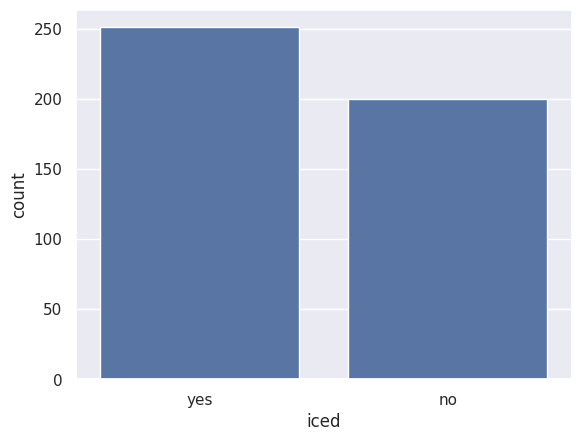

In [113]:
sns.countplot(data = df, x = 'iced')
plt.show()

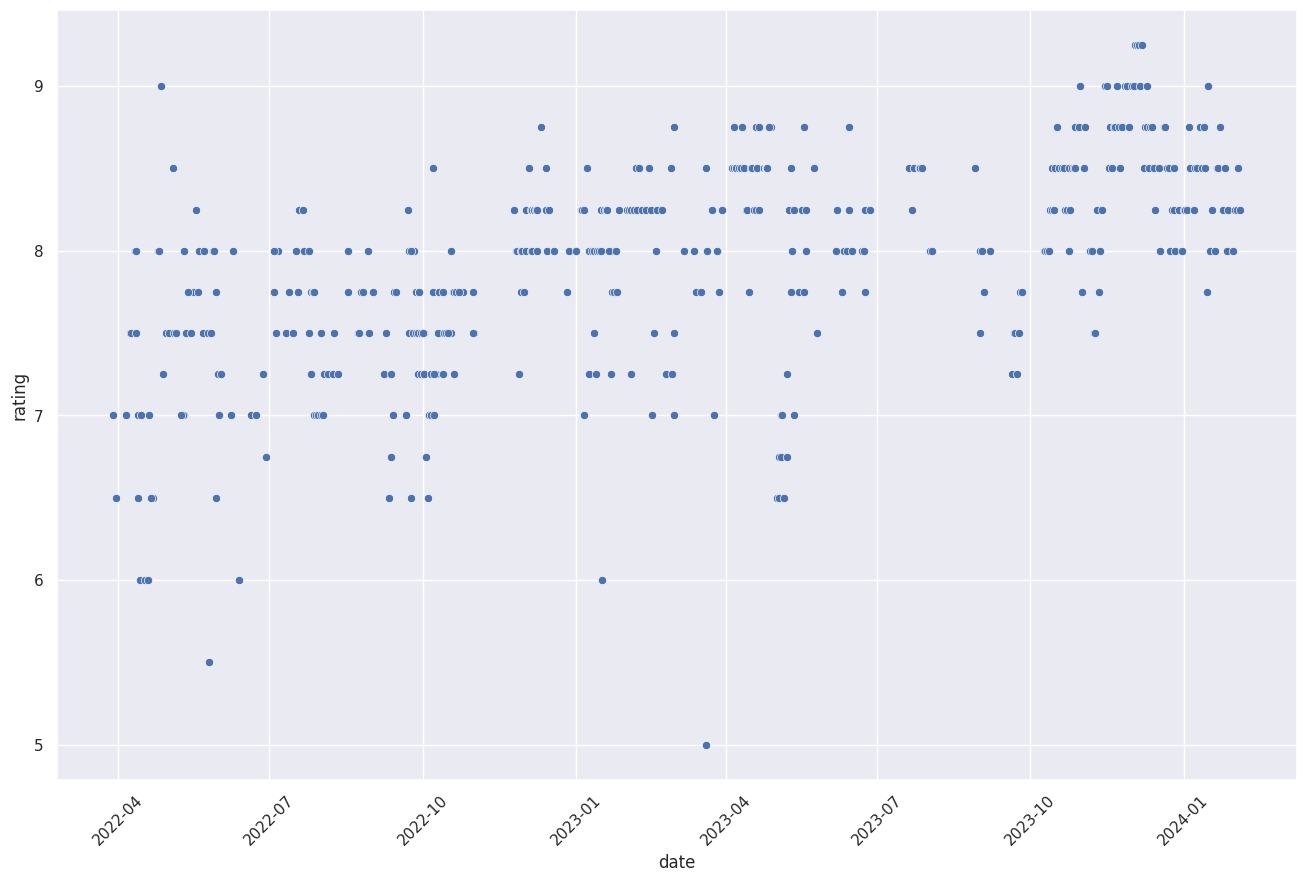

In [114]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45)
sns.scatterplot(x='date', y = 'rating', data = df)
plt.show()

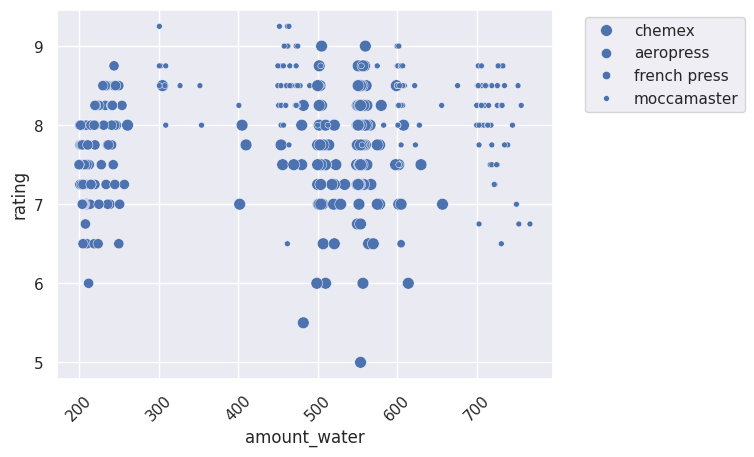

In [115]:
sns.scatterplot(x = 'amount_water', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

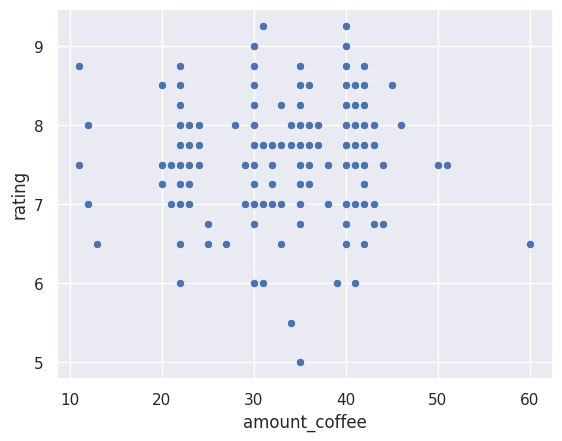

In [116]:
sns.scatterplot(x = 'amount_coffee', y = 'rating', data = df)
plt.show()

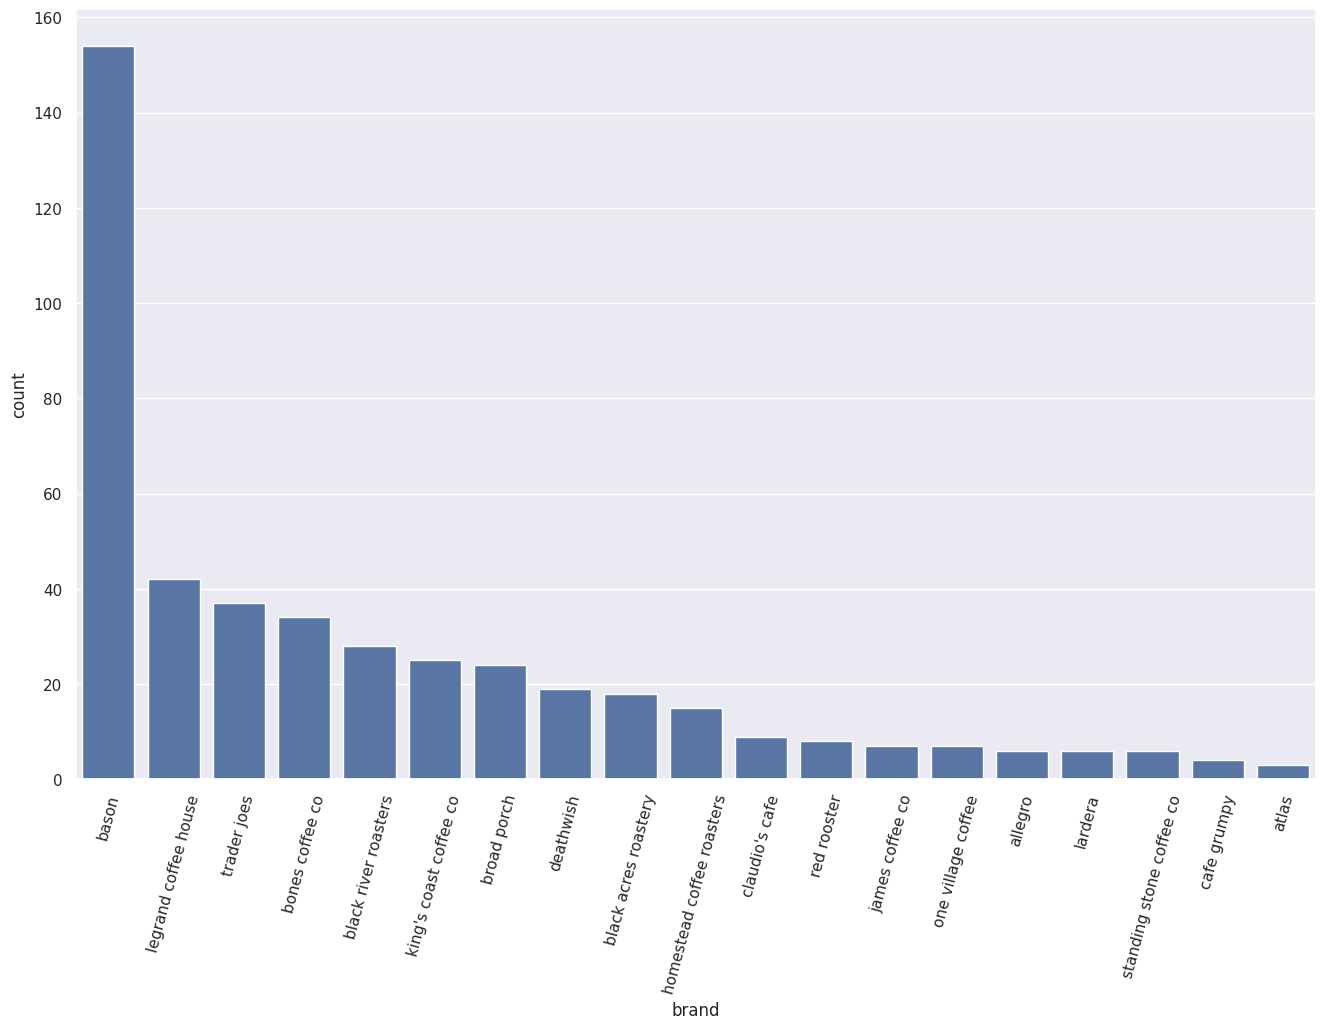

In [117]:
plt.figure(figsize = (16,10))
sns.countplot(x = 'brand', order = df['brand'].value_counts().index, data = df)#hue = 'method',
plt.xticks(rotation = 75)
plt.show()

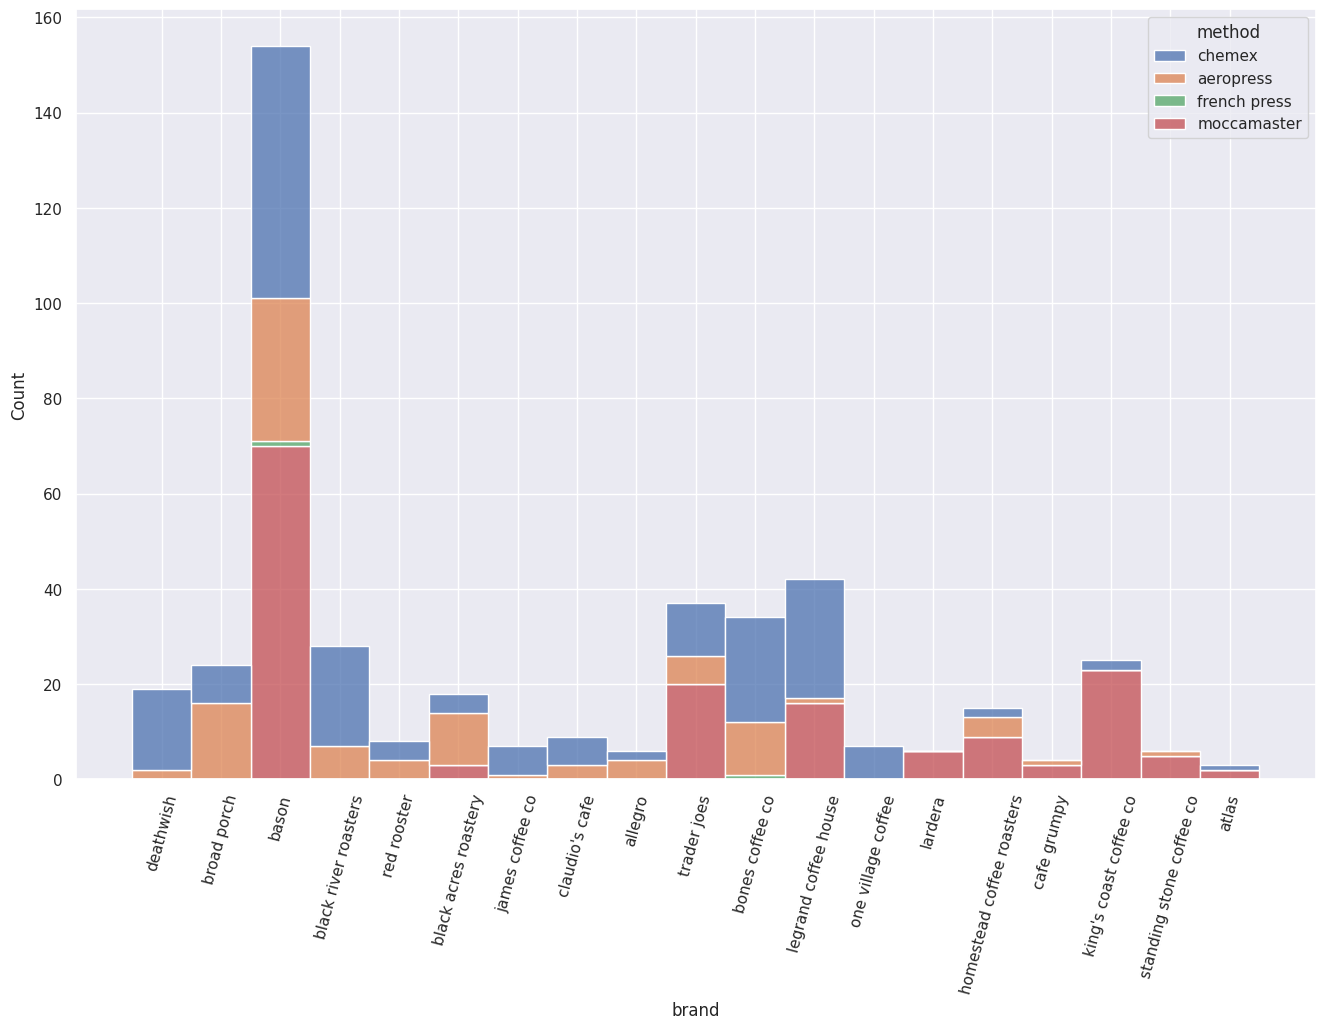

In [118]:
plt.figure(figsize = (16,10))
sns.histplot(x = 'brand', hue = 'method', multiple = 'stack', data = df)
plt.xticks(rotation = 75)
plt.show()

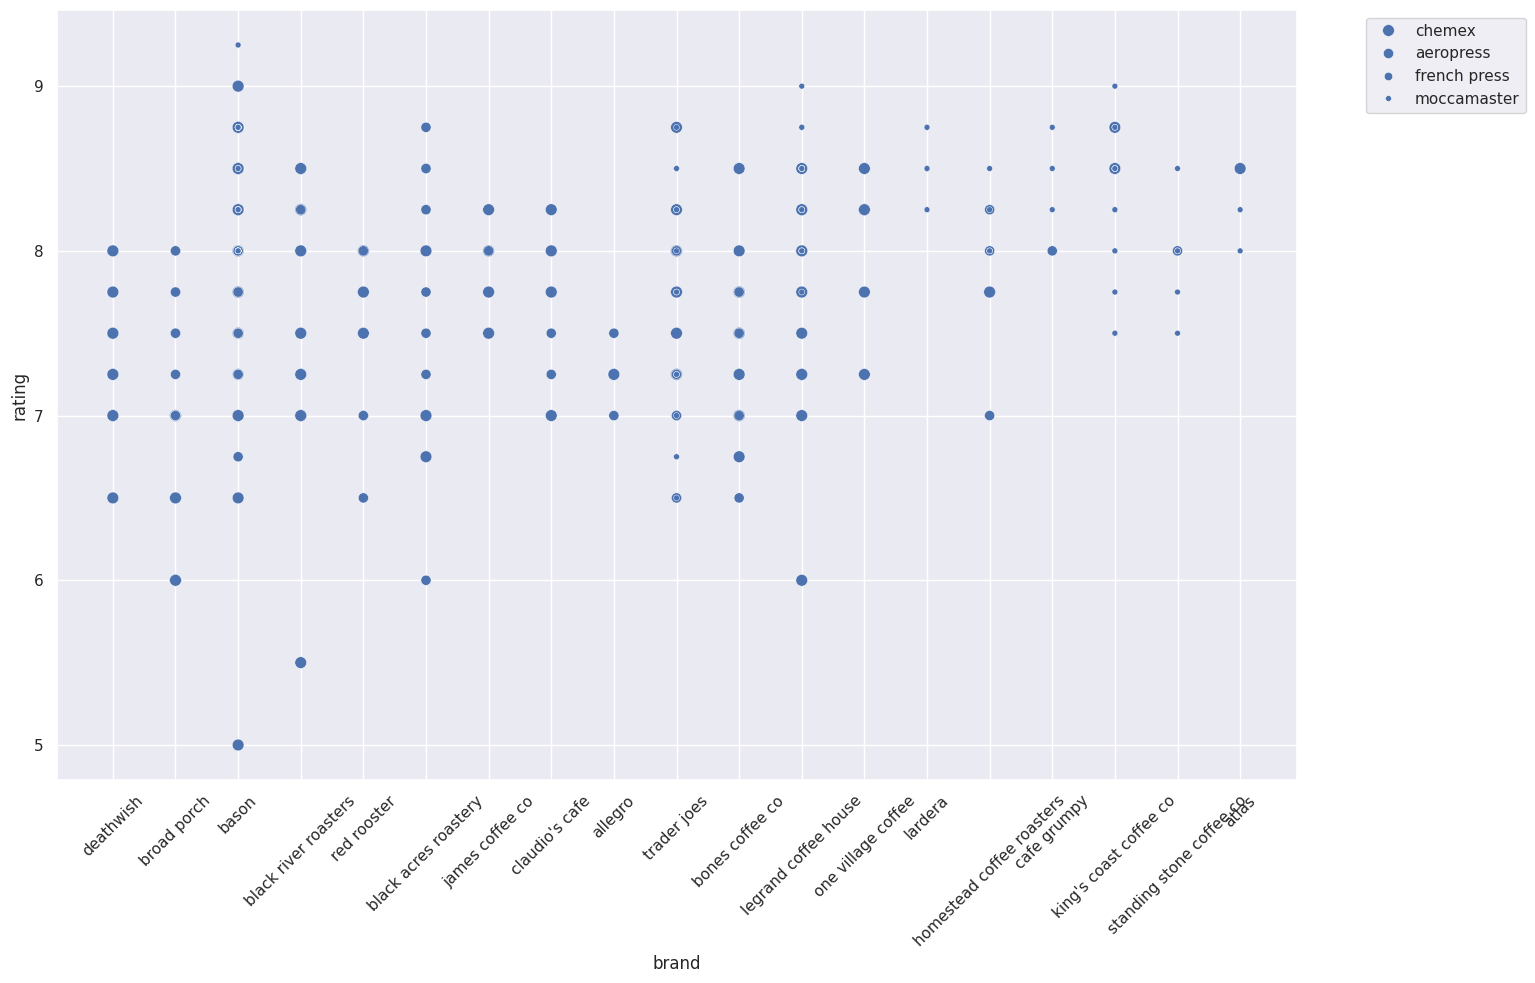

In [119]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = 'brand', y = 'rating', size = 'method', data = df)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

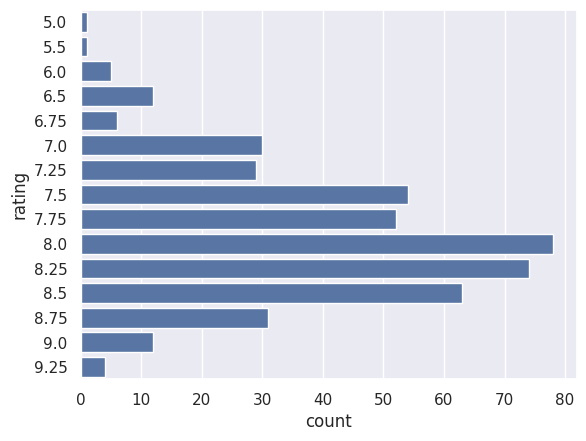

In [120]:
sns.countplot(data = df, y = 'rating')
plt.show()

Almost a normal distribution. It was not intentional but still kind of cool to see it happen.

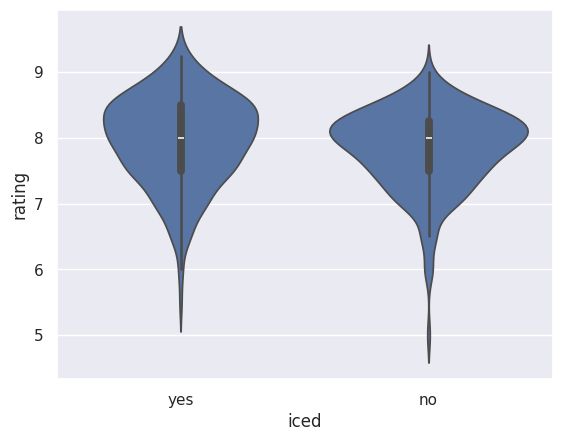

In [121]:
sns.violinplot(data = df, y = 'rating', x = 'iced')
plt.show()

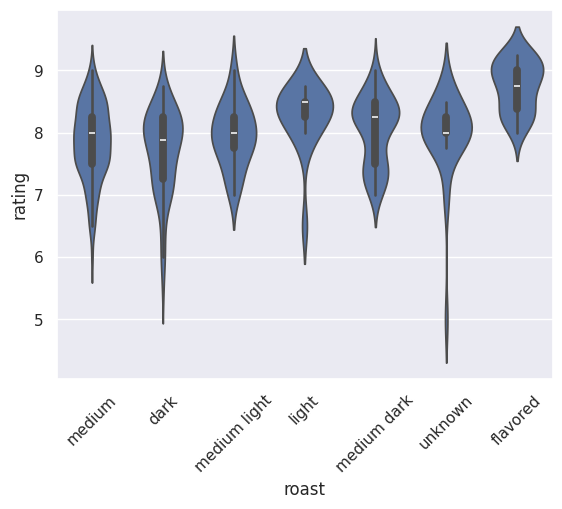

In [122]:
sns.violinplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

There are many different ways to call various roasts that are effectively the same. In the near future, I will be combining these into less categories. I think it will be a worthwhile task to change unknown to flavored coffee as the added flavor of the coffee may distract from my rating.

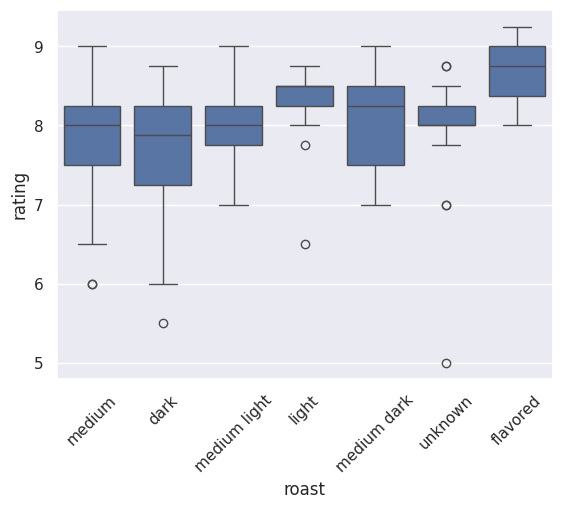

In [123]:
sns.boxplot(data = df, y = 'rating', x = 'roast')
plt.xticks(rotation = 45)
plt.show()

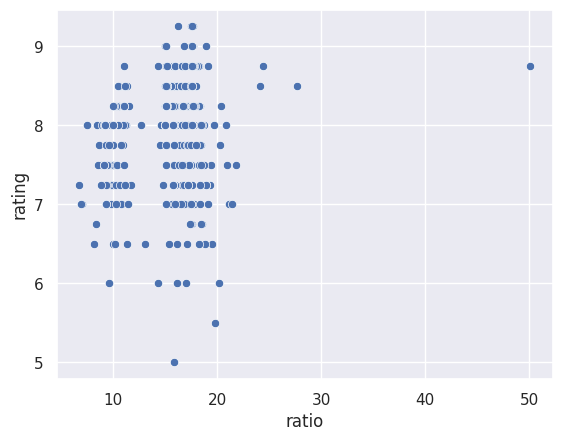

In [124]:
sns.scatterplot(data = df, y = 'rating', x = 'ratio')
plt.show()

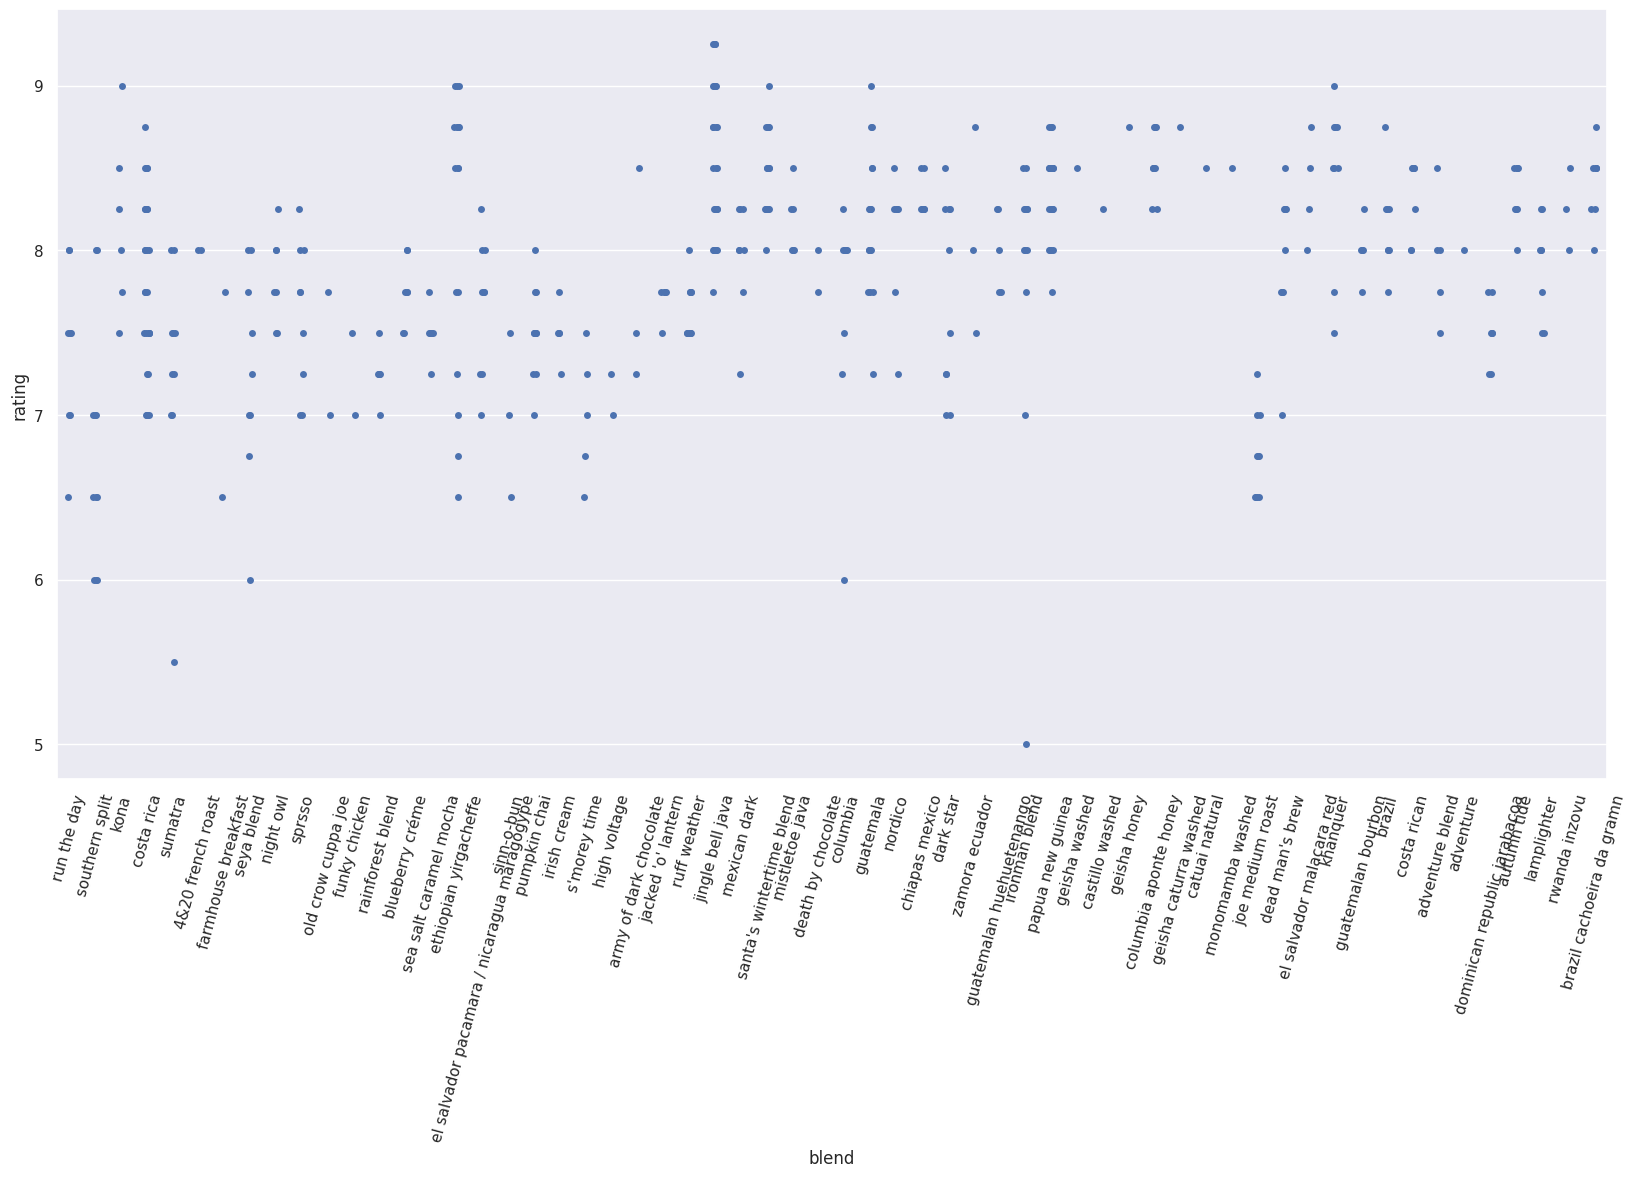

In [125]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df, y = 'rating', x = 'blend')
plt.xticks(rotation = 75)
plt.show()

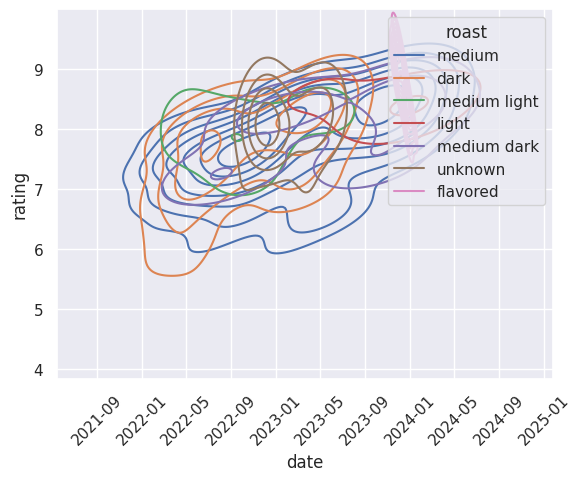

In [126]:
sns.kdeplot(data = df, y = 'rating', x = 'date', hue = 'roast')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45)
plt.show()

Spliting the final dataframe into 3 separate ones based on the method of brewing. From here, I could make additional visualizations or begin training machine learning models to try and predict the rating based on the various factors.

In [127]:
df1, df2, df3, df4 = [x for _, x in df.groupby(df['method'])]
# df1 is aeropress, df2 is chemex, df3 is french press

In [128]:
df2.tail()

,date,brand,roast,blend,iced,grind_size,method,amount_coffee,amount_water,amount_ice,bloom_time,rating,grinder_used,total_time_m,total_time_s,ratio
365,2023-10-28,king's coast coffee co,medium,khanquer,no,25,chemex,30,502,0.0,45.0,8.75,Wilfa,4.0,20,16.733333
383,2023-11-19,bason,medium,ethiopian yirgacheffe,no,25,chemex,30,503,0.0,45.0,8.50,Wilfa,3.0,30,16.766667
403,2023-12-10,bason,medium dark,santa's wintertime blend,no,22,chemex,30,505,0.0,45.0,9.00,Wilfa,5.0,24,16.833333
409,2023-12-17,bason,medium dark,santa's wintertime blend,yes,22,chemex,30,305,209.0,45.0,8.50,Wilfa,4.0,17,17.133333
418,2023-12-26,atlas,light,rwanda inzovu,no,20,chemex,30,500,0.0,45.0,8.50,Wilfa,5.0,24,16.666667


In [129]:
# df.loc[df['team'] == 'A', 'points'].mean()

for i in df['brand'].unique():
    print(i, df.loc[df['brand'] == i, 'rating'].mean())

deathwish 7.447368421052632
broad porch 7.125
bason 8.212662337662337
black river roasters 7.723214285714286
red rooster 7.4375
black acres roastery 7.888888888888889
james coffee co 7.821428571428571
claudio's cafe 7.611111111111111
allegro 7.25
trader joes 7.581081081081081
bones coffee co 7.455882352941177
legrand coffee house 8.053571428571429
one village coffee 8.071428571428571
lardera 8.541666666666666
homestead coffee roasters 7.983333333333333
cafe grumpy 8.375
king's coast coffee co 8.24
standing stone coffee co 7.958333333333333
atlas 8.25


In [130]:
df.brand.value_counts()[0:]

brand
bason                        154
legrand coffee house          42
trader joes                   37
bones coffee co               34
black river roasters          28
king's coast coffee co        25
broad porch                   24
deathwish                     19
black acres roastery          18
homestead coffee roasters     15
claudio's cafe                 9
red rooster                    8
james coffee co                7
one village coffee             7
allegro                        6
lardera                        6
standing stone coffee co       6
cafe grumpy                    4
atlas                          3
Name: count, dtype: int64

In [131]:
#df_unique = df.brand.unique()
for i in df['brand'].unique():
    df_unique = (df.loc[df['brand'] == i, 'rating'].mean())

Getting the average rating from each brand as well as the number of times I have used a specific brand of coffee.

In [132]:
df_3 = df.groupby('brand').agg({'rating':['mean','count']})
df_3.columns = df_3.columns.droplevel()
df_3

,mean,count
brand,,
allegro,7.250000,6
atlas,8.250000,3
bason,8.212662,154
black acres roastery,7.888889,18
black river roasters,7.723214,28
bones coffee co,7.455882,34
broad porch,7.125000,24
cafe grumpy,8.375000,4
claudio's cafe,7.611111,9
